# Exercise Round 7

## Exercise 2
### Imports

In [3]:
%matplotlib inline
import numpy as np
import scipy.linalg as linalg
import scipy.integrate as integrate
import math
import matplotlib.pyplot as plt

### Define the ODE

In [2]:
def f(x,lam):
    return lam * x * (1 - x)

### Closed-form solution

In [3]:
def ode_sol(t,x0,lam):
    return 1 / (1 + ((1 - x0) / x0) * np.exp(-lam*t))

### Euler method

0.012934309733175164


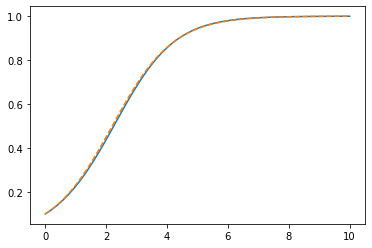

In [4]:
lam = 1.0
x0  = 1.0/10.0

t = np.linspace(0,10,100)

x_euler = np.zeros((t.shape[0],))
cx = x0
x_euler[0] = cx
for i in range(1,t.shape[0]):
    dt = t[i] - t[i-1]
    cx = cx + f(cx,lam) * dt
    x_euler[i] = cx

x = ode_sol(t,x0,lam)
print(np.max(np.abs(x - x_euler)))
    
plt.clf()
plt.plot(t,x_euler,t,x,'--')

### 4th order Runge-Kutta

1.2426488005257141e-07


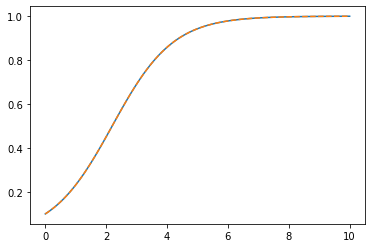

In [5]:
t = np.linspace(0,10,100)

x_rk4 = np.zeros((t.shape[0],))
cx = x0
x_rk4[0] = cx
for i in range(1,t.shape[0]):
    dt = t[i] - t[i-1]
    cx1 = cx;
    dx1 = f(cx1,lam) * dt;
    cx2 = cx + 0.5 * dx1;
    dx2 = f(cx2,lam) * dt;
    cx3 = cx + 0.5 * dx2;
    dx3 = f(cx3,lam) * dt;
    cx4 = cx + dx3;
    dx4 = f(cx4,lam) * dt;
    cx  = cx + 1/6 * (dx1 + 2*dx2 + 2*dx3 + dx4);
    x_rk4[i] = cx

x = ode_sol(t,x0,lam)
print(np.max(np.abs(x - x_rk4)))
    
plt.clf()
plt.plot(t,x_rk4,t,x,'--')

### Builtin ODE solver

In [6]:
mod_f = lambda x,t: f(x,lam)
x_odeint = integrate.odeint(mod_f,x0,t)

1.2397002779884758e-07


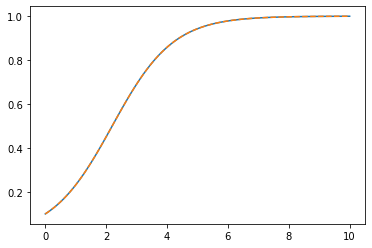

In [7]:
x = ode_sol(t,x0,lam)
print(np.max(np.abs(x - x_odeint[:,0])))

plt.clf()
plt.plot(t,x_odeint,t,x,'--')


## Exercise 3

The equation in canonical form is
$$
\frac{d}{dt} \underbrace{\begin{bmatrix}
  p^x \\ p^y \\ \varphi
\end{bmatrix}}_{\mathbf{x}}
= \begin{bmatrix}
  v \, \cos(\varphi) \\ v \, \sin(\varphi) \\ \omega_{gyro}
\end{bmatrix}
+
\begin{bmatrix}
  1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
  w_1 \\ w_2 \\ w_3
\end{bmatrix}
$$
which is
$$
  \dot{\mathbf{x}} = \mathbf{f}(\mathbf{x},\mathbf{u}) + \mathbf{B} \, \mathbf{w}
$$
where
$$
\mathbf{x} = \begin{bmatrix}
  p^x \\ p^y \\ \varphi
\end{bmatrix}, \qquad \mathbf{u} = \begin{bmatrix}
  v \\ \omega_{gyro}
\end{bmatrix} \\
\mathbf{f}(\mathbf{x},\mathbf{u})
= \begin{bmatrix}
  u_1 \, \cos(x_3) \\ u_1 \, \sin(x_3) \\ u_2
\end{bmatrix}, \qquad \mathbf{B} = \mathbf{I}, \qquad \mathbf{w} = \begin{bmatrix}
  w_1 \\ w_2 \\ w_3
\end{bmatrix}
$$


### Robot dynamics without noise

In [1]:
def fr(x,u):
    return np.array([u[0] * np.cos(x[2]), u[0] * np.sin(x[2]), u[1]])

In [4]:
x0 = np.array([0,0,0])
dt = 0.1
tr = np.arange(0,5+dt,dt)    

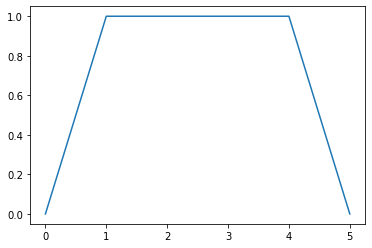

In [5]:
V = np.zeros((tr.shape[0],))
Omega = np.zeros((tr.shape[0],))
for k in range(tr.shape[0]):
    if tr[k] < 1:
        V[k] = tr[k]
    elif tr[k] >= 4:
        V[k] = 5 - tr[k]
    else:
        V[k] = 1
        
    if tr[k] < 2 or tr[k] >= 3:
        Omega[k] = 0
    else:
        Omega[k] = math.pi / 2

plt.clf()
#plt.plot(tr,Omega)
plt.plot(tr,V)

(51,)


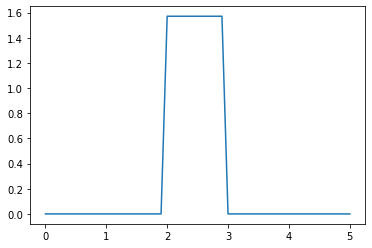

In [6]:
plt.plot(tr,Omega)
print(Omega.shape)

Text(0.5, 1.0, 'Position')

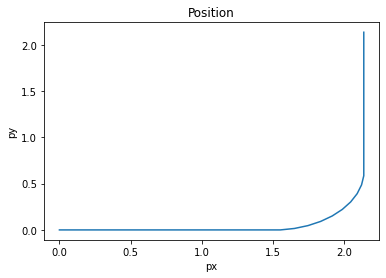

In [7]:
xr = np.zeros((tr.shape[0],3))
cx = x0
for k in range(1,tr.shape[0]):
    u  = np.array([V[k-1],Omega[k-1]])
    dt = tr[k] - tr[k-1]
    cx = cx + dt * fr(cx,u);    
    xr[k,:] = cx;
    
plt.clf()
plt.plot(xr[:,0],xr[:,1])
plt.xlabel('px')
plt.ylabel('py')
plt.title('Position')

Text(0.5, 1.0, 'Orientation')

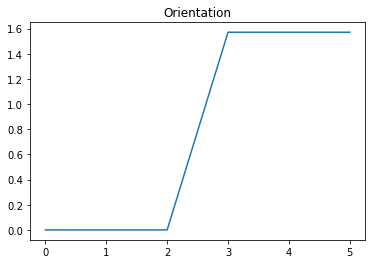

In [8]:
plt.clf()
plt.plot(tr,xr[:,2])
plt.title('Orientation')

### Robot dynamics with noise

Text(0.5, 1.0, 'Position')

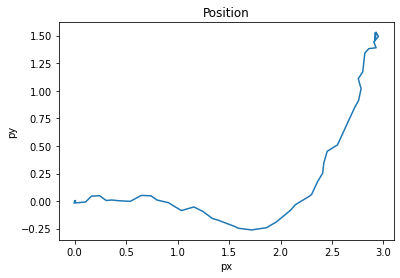

In [13]:
xrn = np.zeros((tr.shape[0],3))
cx = x0
q1 = 0.01
q2 = 0.01
q3 = 0.01

for k in range(1,tr.shape[0]):
    u  = np.array([V[k-1],Omega[k-1]])
    dt = tr[k] - tr[k-1]
    w  = np.diag(np.sqrt(dt * np.array([q1,q2,q3]))) @ np.random.normal(size=(3,))
    cx = cx + dt * fr(cx,u) + w;    
    xrn[k,:] = cx;
    
plt.clf()
plt.plot(xrn[:,0],xrn[:,1])
plt.xlabel('px')
plt.ylabel('py')
plt.title('Position')

Text(0.5, 1.0, 'Orientation')

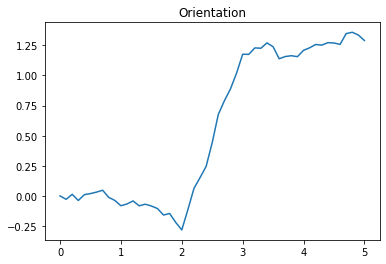

In [14]:
plt.clf()
plt.plot(tr,xrn[:,2])
plt.title('Orientation')